In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
groceries = pd.read_excel('final_data.xlsx')
groceries

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,NO.TRANSAKSI,DATE,DESCRIPTION_CLEANED,QTY
0,2301011000001,2023-01-01,MADU NSTR SUPER 650ML,1
1,2301011000001,2023-01-01,STELLA MTC F,1
2,2301011000001,2023-01-01,GELAS KOPI BOLA50,2
3,2301011000001,2023-01-01,MIKA BX IV,3
4,2301011000002,2023-01-01,LAGIE GOLD CM 75GW,2
...,...,...,...,...
21929,2312311020099,2023-12-31,INDOMIE SOTO MIE,1
21930,2312311020099,2023-12-31,INDOMIE KARI AYAM,1
21931,2312311020099,2023-12-31,INDOMIE KALDU AYAM,3
21932,2312311020099,2023-12-31,SEDAAP MIE KOREAN,1


In [3]:
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NO.TRANSAKSI         21934 non-null  int64         
 1   DATE                 21934 non-null  datetime64[ns]
 2   DESCRIPTION_CLEANED  21932 non-null  object        
 3   QTY                  21934 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 685.6+ KB


In [4]:
#Renaming the columns to simple words
groceries.rename(columns = {'NO.TRANSAKSI':'id','DESCRIPTION_CLEANED':'item'}, inplace = True)

In [5]:
#Creating temporary data which has quantity purchased column
temp=groceries.copy()
temp['qty_purchased']=groceries['id'].map(groceries['id'].value_counts())
temp

,id,DATE,item,QTY,qty_purchased
0,2301011000001,2023-01-01,MADU NSTR SUPER 650ML,1,4
1,2301011000001,2023-01-01,STELLA MTC F,1,4
2,2301011000001,2023-01-01,GELAS KOPI BOLA50,2,4
3,2301011000001,2023-01-01,MIKA BX IV,3,4
4,2301011000002,2023-01-01,LAGIE GOLD CM 75GW,2,2
...,...,...,...,...,...
21929,2312311020099,2023-12-31,INDOMIE SOTO MIE,1,6
21930,2312311020099,2023-12-31,INDOMIE KARI AYAM,1,6
21931,2312311020099,2023-12-31,INDOMIE KALDU AYAM,3,6
21932,2312311020099,2023-12-31,SEDAAP MIE KOREAN,1,6


In [6]:
#Creating sparse matrix 
basket = (temp.groupby(['id', 'item'])['qty_purchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id'))

#Eoding the quantity urchased
def encode(x):
    '''Encoding the quantity of products with 0s and 1s
    0:when qty is less than or equal to 0
    1:when qty is greater than or equal to 1'''
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#Appying on our data
basket_sets = basket.applymap(encode)
basket_sets

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2168\492910806.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode)


item,3M MASKER RESPIRATOR1,ABC ALK A22 LR062B1B,ABC ALK LR03 4B2B,ABC ALK LR06 2B MP,ABC ALK LR06 4B2R9,ABC ALKALINE A24 LR6,ABC ALKALINE A32 LR03,ABC BAT BIRU CZ R20,ABC BAT BIRU R142,ABC BAT BIRU R612,...,ZWITSAL BB MYK TLON 250ML,ZWITSAL BB NAT MTELON 60ML,ZWITSAL COL FLO KISS 100,ZWITSAL EAU DE TOILETTE 100,ZWITSAL H,ZWITSAL HAIR LOT ALMD100ML,ZWITSAL SHP ALOE 100ML,ZWITSAL SOAP 4X70G,ZWITSAL SOAP CLSS70G,ZWITSAL SOAP R
id,,,,,,,,,,,,,,,,,,,,,
2301011000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312311020095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True, low_memory=True)

#Associaton rules-using lift
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets))
rules

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(HIT MAT 486 GREEN),(INDOMIE GRG SPECIAL),0.001407,0.048959,0.001125,0.800000,16.340230,1.0,0.001057,4.755205,0.940124,0.022857,0.789704,0.411494
1,(NUTRIJELL LCI 10G),(NUTRIJELL CKL 20G),0.001407,0.003939,0.001407,1.000000,253.857143,1.0,0.001401,inf,0.997464,0.357143,1.000000,0.678571
2,(NUTRIJELL LCI 10G),(NUTRIJELL GRP 10G),0.001407,0.002814,0.001407,1.000000,355.400000,1.0,0.001403,inf,0.998591,0.500000,1.000000,0.750000
3,(OOPS RSC 10G),(OOPS BCT 10G),0.001970,0.003658,0.001688,0.857143,234.329670,1.0,0.001681,6.974395,0.997698,0.428571,0.856618,0.659341
4,(POPMIE BASO SAPI 35G),(POPMIE MINI SOTO 35G),0.001407,0.001688,0.001125,0.800000,473.866667,1.0,0.001123,4.991559,0.999296,0.571429,0.799662,0.733333
5,"(INDOMIE GORENG ACEH, INDOMIE AYAM BAWANG)",(INDOMIE GRG SPECIAL),0.001688,0.048959,0.001407,0.833333,17.021073,1.0,0.001324,5.706246,0.942841,0.028571,0.824753,0.431034
6,"(INDOMIE GORENG ACEH, INDOMIE SEBLAK HOT)",(INDOMIE GRG KEBAB RDG),0.001407,0.004502,0.001125,0.800000,177.700000,1.0,0.001119,4.977490,0.995773,0.235294,0.799096,0.525000
7,"(INDOMIE SEBLAK HOT, INDOMIE GRG KEBAB RDG)",(INDOMIE GORENG ACEH),0.001125,0.011818,0.001125,1.000000,84.619048,1.0,0.001112,inf,0.989296,0.095238,1.000000,0.547619
8,"(KAPAL GARAM 250G, INDOMIE SOTO MIE)",(INDOMIE GRG SPECIAL),0.001125,0.048959,0.001125,1.000000,20.425287,1.0,0.001070,inf,0.952113,0.022989,1.000000,0.511494
9,"(TELOR HORN, INDOMIE SOTO MIE)",(INDOMIE GRG SPECIAL),0.001407,0.048959,0.001125,0.800000,16.340230,1.0,0.001057,4.755205,0.940124,0.022857,0.789704,0.411494


In [16]:
#Customizable function to change the lift and confidence
def rules_mod(lift, confidence):
    '''rules_mod is a function to control the rules 
    based on lift and confidence threshold'''
    filtered_rules = rules[(rules['lift'] >= lift) & (rules['confidence'] >= confidence)]
    return filtered_rules.reset_index(drop=True) 

#Calling function
rules = rules_mod(1, 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,lhs items,antecedents_,consequents_
0,(NUTRIJELL LCI 10G),(NUTRIJELL CKL 20G),0.001407,0.003939,0.001407,1.0,253.857143,1.0,0.001401,inf,0.997464,0.357143,1.0,0.678571,1,NUTRIJELL LCI 10G,NUTRIJELL CKL 20G
1,(NUTRIJELL LCI 10G),(NUTRIJELL GRP 10G),0.001407,0.002814,0.001407,1.0,355.400000,1.0,0.001403,inf,0.998591,0.500000,1.0,0.750000,1,NUTRIJELL LCI 10G,NUTRIJELL GRP 10G
2,"(INDOMIE SEBLAK HOT, INDOMIE GRG KEBAB RDG)",(INDOMIE GORENG ACEH),0.001125,0.011818,0.001125,1.0,84.619048,1.0,0.001112,inf,0.989296,0.095238,1.0,0.547619,2,"INDOMIE SEBLAK HOT,INDOMIE GRG KEBAB RDG",INDOMIE GORENG ACEH
3,"(KAPAL GARAM 250G, INDOMIE SOTO MIE)",(INDOMIE GRG SPECIAL),0.001125,0.048959,0.001125,1.0,20.425287,1.0,0.001070,inf,0.952113,0.022989,1.0,0.511494,2,"KAPAL GARAM 250G,INDOMIE SOTO MIE",INDOMIE GRG SPECIAL
4,"(SEDAAP MIE SOTO, SUNLIGHT LIME 650MLREF)",(INDOMIE GRG SPECIAL),0.001125,0.048959,0.001125,1.0,20.425287,1.0,0.001070,inf,0.952113,0.022989,1.0,0.511494,2,"SEDAAP MIE SOTO,SUNLIGHT LIME 650MLREF",INDOMIE GRG SPECIAL
5,"(NUTRIJELL GRP 10G, NUTRIJELL LCI 10G)",(NUTRIJELL CKL 20G),0.001407,0.003939,0.001407,1.0,253.857143,1.0,0.001401,inf,0.997464,0.357143,1.0,0.678571,2,"NUTRIJELL GRP 10G,NUTRIJELL LCI 10G",NUTRIJELL CKL 20G
6,"(NUTRIJELL CKL 20G, NUTRIJELL LCI 10G)",(NUTRIJELL GRP 10G),0.001407,0.002814,0.001407,1.0,355.400000,1.0,0.001403,inf,0.998591,0.500000,1.0,0.750000,2,"NUTRIJELL CKL 20G,NUTRIJELL LCI 10G",NUTRIJELL GRP 10G
7,(NUTRIJELL LCI 10G),"(NUTRIJELL GRP 10G, NUTRIJELL CKL 20G)",0.001407,0.001688,0.001407,1.0,592.333333,1.0,0.001404,inf,0.999718,0.833333,1.0,0.916667,1,NUTRIJELL LCI 10G,"NUTRIJELL GRP 10G,NUTRIJELL CKL 20G"
8,"(NUVO SOAP GREEN 72G, NUVO SOAP YLOW 72G)",(NUVO SOAP BLUE 72G),0.001407,0.003939,0.001407,1.0,253.857143,1.0,0.001401,inf,0.997464,0.357143,1.0,0.678571,2,"NUVO SOAP GREEN 72G,NUVO SOAP YLOW 72G",NUVO SOAP BLUE 72G
9,"(NUVO SOAP YLOW 72G, NUVO SOAP TOSKA 72G)",(NUVO SOAP PURPLE 72G),0.001125,0.006753,0.001125,1.0,148.083333,1.0,0.001118,inf,0.994366,0.166667,1.0,0.583333,2,"NUVO SOAP YLOW 72G,NUVO SOAP TOSKA 72G",NUVO SOAP PURPLE 72G


In [17]:
rules = rules[['antecedents','consequents','support','confidence','lift']]
rules

,antecedents,consequents,support,confidence,lift
0,(NUTRIJELL LCI 10G),(NUTRIJELL CKL 20G),0.001407,1.0,253.857143
1,(NUTRIJELL LCI 10G),(NUTRIJELL GRP 10G),0.001407,1.0,355.400000
2,"(INDOMIE SEBLAK HOT, INDOMIE GRG KEBAB RDG)",(INDOMIE GORENG ACEH),0.001125,1.0,84.619048
3,"(KAPAL GARAM 250G, INDOMIE SOTO MIE)",(INDOMIE GRG SPECIAL),0.001125,1.0,20.425287
4,"(SEDAAP MIE SOTO, SUNLIGHT LIME 650MLREF)",(INDOMIE GRG SPECIAL),0.001125,1.0,20.425287
5,"(NUTRIJELL GRP 10G, NUTRIJELL LCI 10G)",(NUTRIJELL CKL 20G),0.001407,1.0,253.857143
6,"(NUTRIJELL CKL 20G, NUTRIJELL LCI 10G)",(NUTRIJELL GRP 10G),0.001407,1.0,355.400000
7,(NUTRIJELL LCI 10G),"(NUTRIJELL GRP 10G, NUTRIJELL CKL 20G)",0.001407,1.0,592.333333
8,"(NUVO SOAP GREEN 72G, NUVO SOAP YLOW 72G)",(NUVO SOAP BLUE 72G),0.001407,1.0,253.857143
9,"(NUVO SOAP YLOW 72G, NUVO SOAP TOSKA 72G)",(NUVO SOAP PURPLE 72G),0.001125,1.0,148.083333


In [18]:
# rules.to_excel('rules_apriori.xlsx', index=False)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\writer\excel.py:292: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  workbook.properties.modified = datetime.datetime.utcnow()


<Axes: xlabel='antecedent support', ylabel='consequent support'>

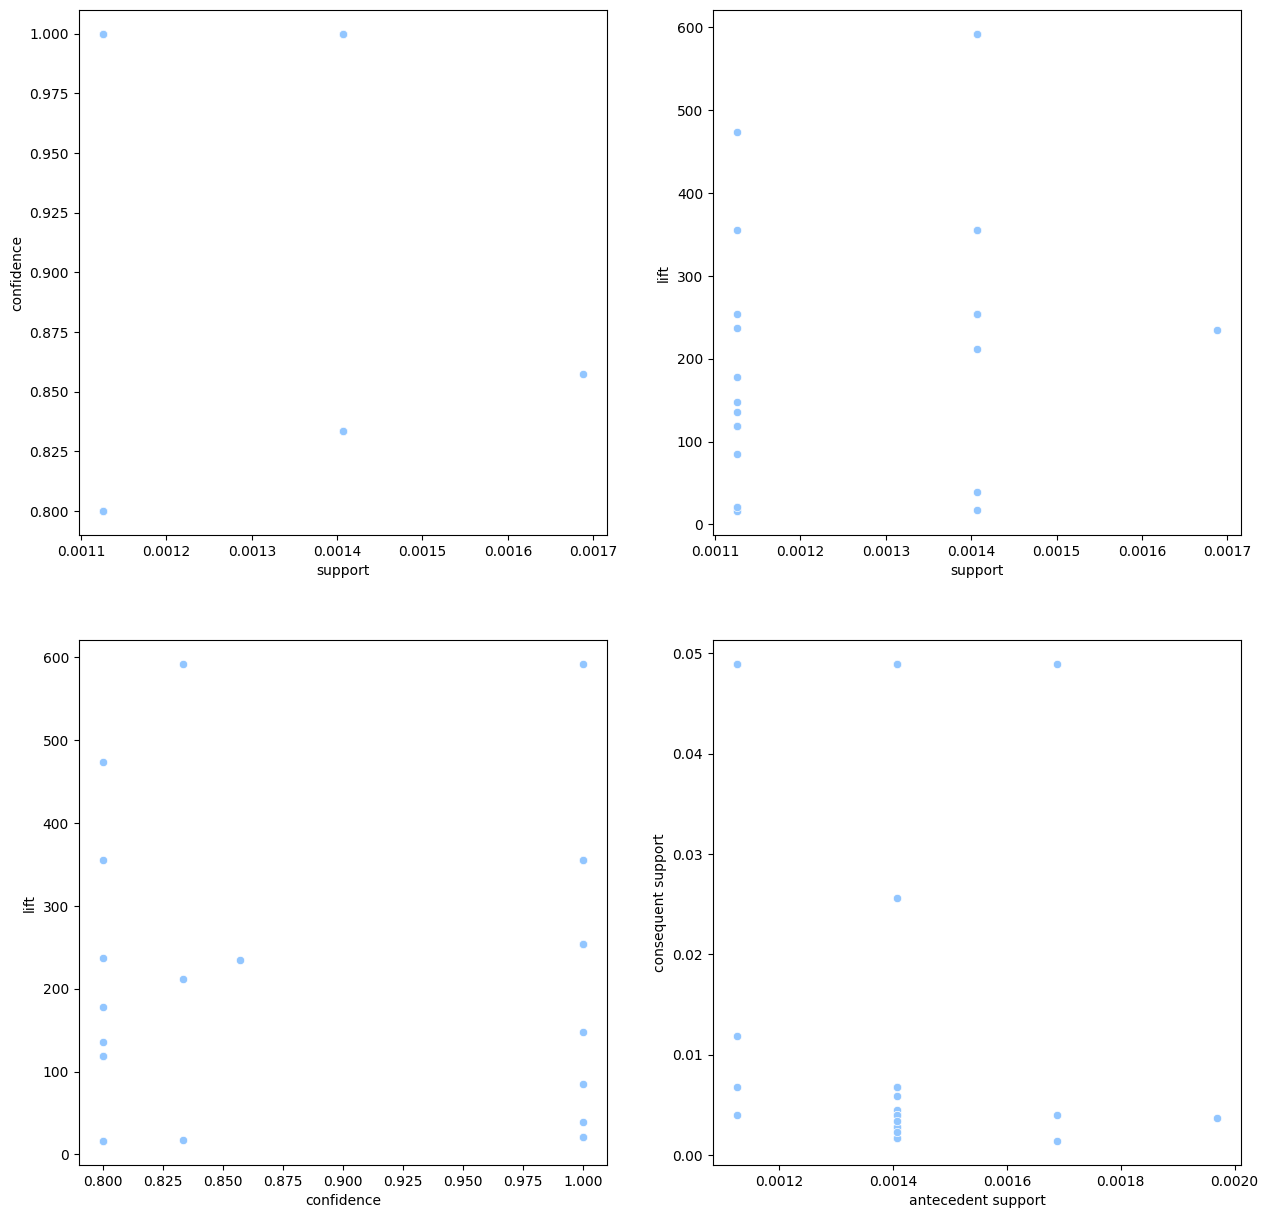

In [13]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-v0_8-pastel')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)

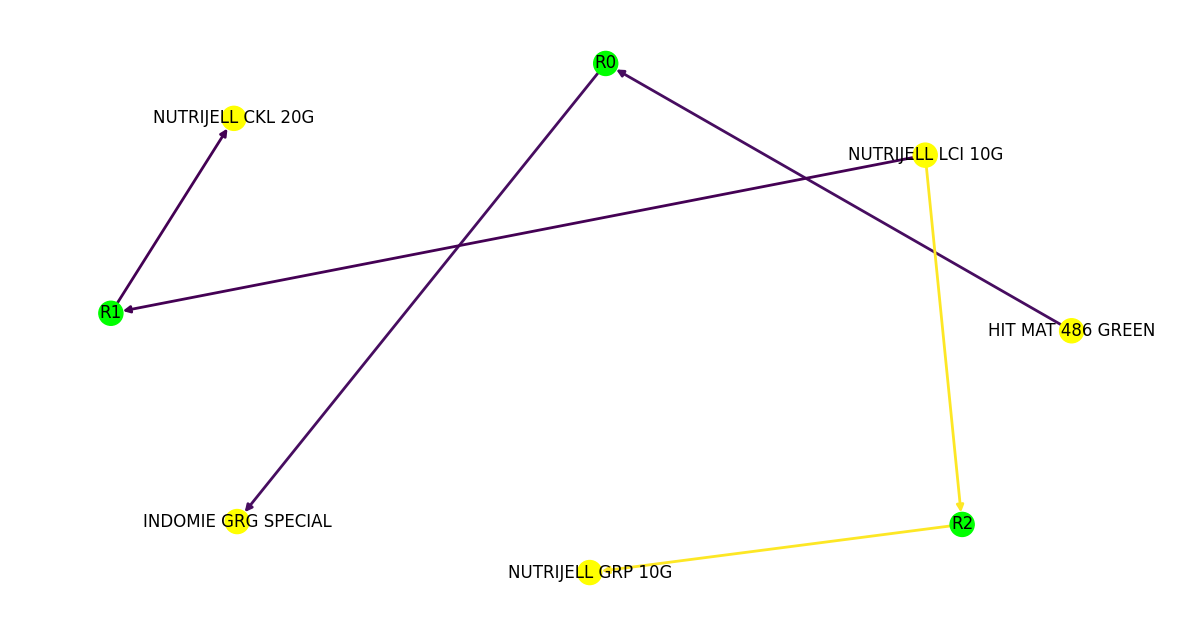

In [14]:
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50  # Membatasi jumlah warna acak
    colors = np.random.rand(N)  # Array warna acak
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']
    
    for i in range(rules_to_show):
        # Menambahkan node untuk setiap rule
        rule_node = "R" + str(i)
        G1.add_node(rule_node)
        
        # Menambahkan edges untuk antecedents (premis) -> rule
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)  # Menambahkan node antecedent
            G1.add_edge(a, rule_node, color=colors[i], weight=2)  # Menghubungkan antecedent ke rule

        # Menambahkan edges untuk rule -> consequents (konsekuen)
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)  # Menambahkan node consequent
            G1.add_edge(rule_node, c, color=colors[i], weight=2)  # Menghubungkan rule ke consequent
    
    # Menentukan warna node
    for node in G1:
        if node in strs:  # Jika node adalah rule node (misalnya R0, R1, ...)
            color_map.append('lime')
        else:  # Jika node adalah antecedent atau consequent
            color_map.append('yellow')
    
    # Menentukan warna dan bobot edge
    edges = G1.edges()
    edge_colors = [G1[u][v]['color'] for u, v in edges]
    edge_weights = [G1[u][v]['weight'] for u, v in edges]
    
    # Menata posisi node menggunakan spring_layout
    pos = nx.spring_layout(G1, k=16, seed=42)
    
    plt.figure(figsize=(15,8))
    plt.gca().set_facecolor("#F0F2F6") 

    # Menggambar graph
    nx.draw(
        G1, pos, node_color=color_map, edge_color=edge_colors, 
        width=edge_weights, font_size=16, with_labels=False
    )
    
    # Menambahkan label node (rule, antecedent, consequent)
    for p in pos:
        pos[p][1] += 0  # Mengangkat posisi label agar tidak menutupi node
    nx.draw_networkx_labels(G1, pos)
    
    # Menampilkan graph
    plt.show()

# Menjalankan fungsi dengan 10 aturan pertama
draw_graph(rules, 3)

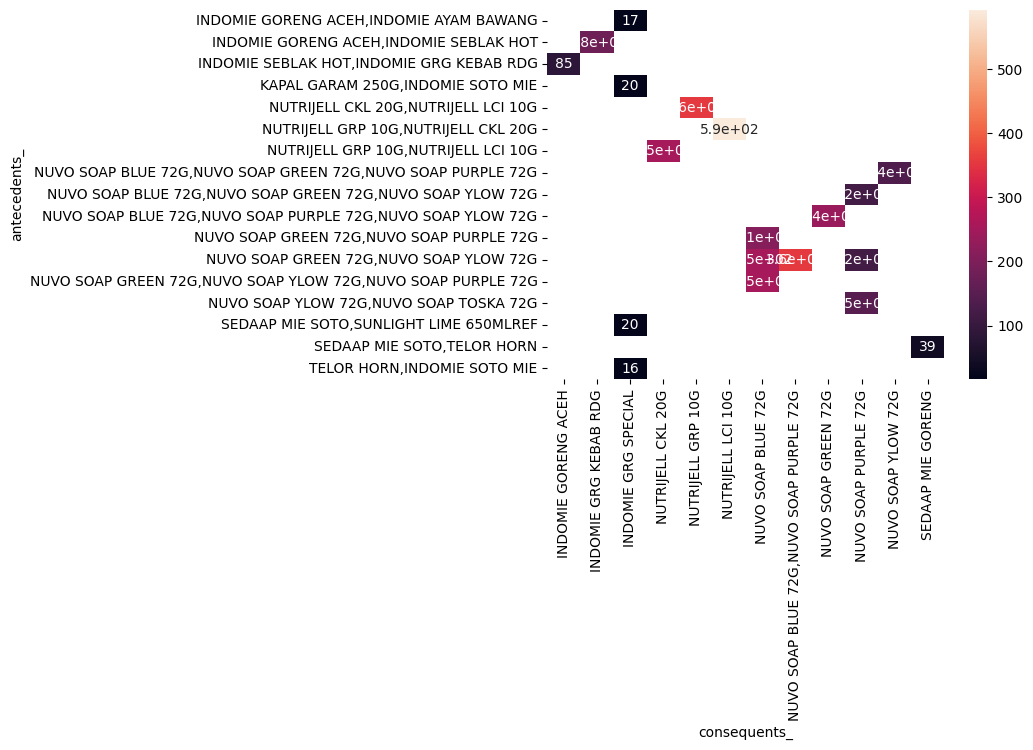

In [15]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()